# Multiple LSTM & GRU Electricty Forecast 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

## Deep Learning Modeling : LSTM

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
# load the dataset
df = pd.read_excel('LSTM.xlsx', usecols=[1], skipfooter=3)
df.shape

(157819, 1)

In [61]:
# For Cross validation
#df=df[23550:109900]
df=df[71100:138000]
df.shape

(66900, 1)

In [4]:
numpy.random.seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [5]:
df=pd.DataFrame(dataset)
df.columns=['Consumption']
print(df.shape)
df.head()

(157819, 1)


,Consumption
0,0.48
1,0.48
2,0.48
3,0.48
4,0.45


### Create Lags

In [7]:
#Lags GRU
lag1=np.arange(1,21,1)
lag2=np.arange(48,68,1)
lag3=np.arange(336,356,1)
lag=np.concatenate([lag1,lag2,lag3])
print('The number of lags are:',lag.shape)
lag

The number of lags are: (30,)


array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,  336,
        337,  338,  339,  340,  341,  342,  343,  344,  345, 1440, 1441,
       1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449])

### For Validation

In [6]:
#lags LSTM for Genetic Algorithm Solution
#lag1=np.arange(1,6,1)
lag1=np.arange(1,8,1)
#lag2=np.arange(690,695,1)
lag2=np.arange(1737,1744,1)
#lag3=np.arange(766,771,1)
lag3=np.arange(958,965,1)
lag=np.concatenate([lag1,lag2,lag3])
print('The number of lags are:',lag.shape)
lag

The number of lags are: (21,)


array([   1,    2,    3,    4,    5,    6,    7, 1737, 1738, 1739, 1740,
       1741, 1742, 1743,  958,  959,  960,  961,  962,  963,  964])

In [32]:
#lags LSTM for PSO Solution
lag1=np.arange(1,12,1)
lag2=np.arange(735,746,1)
lag3=np.arange(385,396,1)
lag=np.concatenate([lag1,lag2,lag3])
print('The number of lags are:',lag.shape)
lag

The number of lags are: (33,)


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 735, 736,
       737, 738, 739, 740, 741, 742, 743, 744, 745, 385, 386, 387, 388,
       389, 390, 391, 392, 393, 394, 395])

In [7]:
#lags LSTM
lag1=np.arange(1,11,1)
lag2=np.arange(48,58,1)
lag3=np.arange(336,346,1)
lag=np.concatenate([lag1,lag2,lag3])
print('The number of lags are:',lag.shape)
lag

The number of lags are: (30,)


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57, 336, 337, 338, 339, 340, 341,
       342, 343, 344, 345])

In [8]:
df1=df
for col in df.columns:
    for l in lag:
        df.loc[:,col+"_"+str(l)] = df[col].shift(l)

In [9]:
df.head()

,Consumption,Consumption_1,Consumption_2,Consumption_3,Consumption_4,Consumption_5,Consumption_6,Consumption_7,Consumption_8,Consumption_9,...,Consumption_336,Consumption_337,Consumption_338,Consumption_339,Consumption_340,Consumption_341,Consumption_342,Consumption_343,Consumption_344,Consumption_345
0,0.48,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.48,0.48,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0.48,0.48,0.48,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0.48,0.48,0.48,0.48,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0.45,0.48,0.48,0.48,0.48,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
df.dropna(how='any',inplace=True)
dataset = df.values # Converted dataframe to numpy ndarray
dataset = dataset.astype('float32')
print(dataset.shape)
dataset

(157474, 31)


array([[0.41629252, 0.38997638, 0.3881529 , ..., 0.47953418, 0.4796447 ,
        0.47620496],
       [0.43726256, 0.41629252, 0.38997638, ..., 0.47834617, 0.47953418,
        0.4796447 ],
       [0.4889417 , 0.43726256, 0.41629252, ..., 0.45179516, 0.47834617,
        0.47953418],
       ...,
       [0.59260386, 0.6127174 , 0.637887  , ..., 0.43927944, 0.4064706 ,
        0.39167553],
       [0.57800215, 0.59260386, 0.6127174 , ..., 0.46280512, 0.43927944,
        0.4064706 ],
       [0.5707497 , 0.57800215, 0.59260386, ..., 0.46331626, 0.46280512,
        0.43927944]], dtype=float32)

In [11]:
# split into train and test sets
#train_size = int(len(dataset) * (0.884))
train_size = int(len(dataset) * 0.74)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

116530 40944


In [12]:
trainX=train[:,1:]
trainY=train[:,0]
testX=test[:,1:]
testY=test[:,0]

In [13]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(116530, 30)
(40944, 30)
(116530,)
(40944,)


In [ ]:
#GRU
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],20,3))
testX = numpy.reshape(testX, (testX.shape[0],20,3))

In [14]:
#LSTM
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0],10,3))
testX = numpy.reshape(testX, (testX.shape[0],10,3))

In [15]:
print(trainY.shape)
print(testY.shape)
print(trainX.shape)
print(testX.shape)

(116530,)
(40944,)
(116530, 10, 3)
(40944, 10, 3)


In [16]:
from keras.callbacks import EarlyStopping
import time

### (A) GRU MODEL

In [ ]:
# create and fit the GRU network
model = Sequential() # New Instance of Model Object
model.add(GRU(60, input_shape=(20,3)))
model.add(Dense(40, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(trainX, trainY, epochs=125, shuffle=True,batch_size=125, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=25)], verbose=1)

end = time.time()
# Training Phase
model.summary()

In [ ]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

## (B) LSTM MODEL

In [17]:
# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(60, input_shape=(10,3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(trainX, trainY, epochs=130, shuffle=True,batch_size=125, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=45)], verbose=1)

end = time.time()
# Training Phase
model.summary()

Train on 116530 samples, validate on 40944 samples
Epoch 1/130
116530/116530 [==============================] - 7s 62us/step - loss: 0.0027 - val_loss: 4.1412e-04
Epoch 2/130
116530/116530 [==============================] - 7s 61us/step - loss: 2.7573e-04 - val_loss: 2.3181e-04
Epoch 3/130
116530/116530 [==============================] - 7s 57us/step - loss: 1.4968e-04 - val_loss: 1.0147e-04
Epoch 4/130
116530/116530 [==============================] - 6s 50us/step - loss: 1.1561e-04 - val_loss: 7.8912e-05
Epoch 5/130
116530/116530 [==============================] - 6s 55us/step - loss: 1.1195e-04 - val_loss: 9.6019e-05
Epoch 6/130
116530/116530 [==============================] - 6s 50us/step - loss: 1.0436e-04 - val_loss: 9.9093e-05
Epoch 7/130
116530/116530 [==============================] - 6s 51us/step - loss: 9.2251e-05 - val_loss: 8.8649e-05
Epoch 8/130
116530/116530 [==============================] - 6s 51us/step - loss: 9.1095e-05 - val_loss: 7.1995e-05
Epoch 9/130
116530/116530

116530/116530 [==============================] - 6s 54us/step - loss: 2.6038e-05 - val_loss: 2.1117e-05
Epoch 71/130
116530/116530 [==============================] - 7s 56us/step - loss: 2.5668e-05 - val_loss: 1.9642e-05
Epoch 72/130
116530/116530 [==============================] - 6s 53us/step - loss: 2.5466e-05 - val_loss: 2.0667e-05
Epoch 73/130
116530/116530 [==============================] - 6s 52us/step - loss: 2.5384e-05 - val_loss: 2.1049e-05
Epoch 74/130
116530/116530 [==============================] - 6s 56us/step - loss: 2.5427e-05 - val_loss: 2.0332e-05
Epoch 75/130
116530/116530 [==============================] - 6s 49us/step - loss: 2.4904e-05 - val_loss: 2.4388e-05
Epoch 76/130
116530/116530 [==============================] - 6s 48us/step - loss: 2.4457e-05 - val_loss: 2.9442e-05
Epoch 77/130
116530/116530 [==============================] - 6s 49us/step - loss: 2.4741e-05 - val_loss: 2.2372e-05
Epoch 78/130
116530/116530 [==============================] - 6s 51us/step - 

### (C) GA Solution

In [ ]:
# create and fit the LSTM network for GA
model = Sequential() # New Instance of Model Object
model.add(LSTM(110, input_shape=(7,3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adamax')

start = time.time()
hist =model.fit(trainX, trainY, epochs=150, shuffle=True,batch_size=34, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=30)], verbose=1)

end = time.time()
# Training Phase
model.summary()

Train on 57598 samples, validate on 7559 samples
Epoch 1/150
57598/57598 [==============================] - 9s 157us/step - loss: 0.0016 - val_loss: 2.5399e-04
Epoch 2/150
57598/57598 [==============================] - 9s 156us/step - loss: 3.1665e-04 - val_loss: 2.1532e-04
Epoch 3/150
57598/57598 [==============================] - 9s 156us/step - loss: 2.6246e-04 - val_loss: 1.6799e-04
Epoch 4/150
57598/57598 [==============================] - 9s 148us/step - loss: 2.2404e-04 - val_loss: 3.8771e-04
Epoch 5/150
57598/57598 [==============================] - 8s 139us/step - loss: 1.9885e-04 - val_loss: 1.2674e-04
Epoch 6/150
57598/57598 [==============================] - 8s 138us/step - loss: 1.7385e-04 - val_loss: 3.7283e-04
Epoch 7/150
57598/57598 [==============================] - 8s 138us/step - loss: 1.5708e-04 - val_loss: 1.1197e-04
Epoch 8/150
57598/57598 [==============================] - 8s 138us/step - loss: 1.4023e-04 - val_loss: 9.8361e-05
Epoch 9/150
57598/57598 [==========

### (D) PSO Solution

In [46]:
# create and fit the LSTM network for GA
model = Sequential() # New Instance of Model Object
model.add(LSTM(60, input_shape=(11,3)))
model.add(Dense(100, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='Adamax')

start = time.time()
hist =model.fit(trainX, trainY, epochs=200, shuffle=True,batch_size=44, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=30)], verbose=1)

end = time.time()
# Training Phase
model.summary()

Train on 116234 samples, validate on 40840 samples
Epoch 1/200
116234/116234 [==============================] - 22s 192us/step - loss: 0.0020 - val_loss: 3.8891e-04
Epoch 2/200
116234/116234 [==============================] - 21s 182us/step - loss: 3.4393e-04 - val_loss: 2.7013e-04
Epoch 3/200
116234/116234 [==============================] - 22s 186us/step - loss: 2.9548e-04 - val_loss: 2.8866e-04
Epoch 4/200
116234/116234 [==============================] - 21s 184us/step - loss: 2.6718e-04 - val_loss: 2.1556e-04
Epoch 5/200
116234/116234 [==============================] - 21s 180us/step - loss: 2.5068e-04 - val_loss: 4.1544e-04
Epoch 6/200
116234/116234 [==============================] - 20s 175us/step - loss: 2.3831e-04 - val_loss: 2.3824e-04
Epoch 7/200
116234/116234 [==============================] - 18s 157us/step - loss: 2.2967e-04 - val_loss: 1.9944e-04
Epoch 8/200
116234/116234 [==============================] - 18s 151us/step - loss: 2.2065e-04 - val_loss: 2.1084e-04
Epoch 9/2

116234/116234 [==============================] - 20s 172us/step - loss: 2.7607e-05 - val_loss: 3.0189e-05
Epoch 138/200
116234/116234 [==============================] - 20s 173us/step - loss: 2.7527e-05 - val_loss: 2.6572e-05
Epoch 139/200
116234/116234 [==============================] - 20s 173us/step - loss: 2.7325e-05 - val_loss: 2.5668e-05
Epoch 140/200
116234/116234 [==============================] - 21s 181us/step - loss: 2.6832e-05 - val_loss: 2.3808e-05
Epoch 141/200
116234/116234 [==============================] - 20s 176us/step - loss: 2.7031e-05 - val_loss: 2.4147e-05
Epoch 142/200
116234/116234 [==============================] - 21s 178us/step - loss: 2.6760e-05 - val_loss: 2.6418e-05
Epoch 143/200
116234/116234 [==============================] - 20s 176us/step - loss: 2.6855e-05 - val_loss: 2.8081e-05
Epoch 144/200
116234/116234 [==============================] - 20s 175us/step - loss: 2.6554e-05 - val_loss: 3.0350e-05
Epoch 145/200
116234/116234 [=========================

## (C) ReLu

In [ ]:
# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(60, input_shape=(10,3)))
model.add(Dense(100, activation='linear'))
model.add(LeakyReLU(alpha=0.04))
model.add(Dense(70, activation='linear'))
model.add(LeakyReLU(alpha=0.04))
model.add(Dense(50, activation='linear'))
model.add(LeakyReLU(alpha=0.04))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(trainX, trainY, epochs=122, shuffle=True,batch_size=125, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=45)], verbose=1)

end = time.time()
# Training Phase
model.summary()

In [18]:
# Training Time
print ("Model took %0.2f seconds to train"%(end - start))
model.save('trained_model.h5')
print('Model saved to Disk')

Model took 583.35 seconds to train
Model saved to Disk


In [ ]:
logger=keras.callbacks.TensorBoard(log_dir='logs', write_graph=True,
                                  histogram_freq=5)

In [18]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
# calculate root mean squared error
print('Mean Absolute Error Train:', mean_absolute_error(trainY[0], trainPredict[:,0]))

testScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error Test:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

Mean Absolute Error Train: 339.44452447635405
Train Score RMSE: 461.02 RMSE
Mean Absolute Error Test: 313.6024615498859
Mean Squared Error Test: 421.6716305054785


In [22]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))

Mean Absolute Error: 313.6024615498859
Mean Squared Error: 421.6716305054785


In [25]:
testY.mean()

54379.22109290124

## Forecasting Horizons

In [ ]:
testY.shape

print(np.mean(testY[:,0:48]))

In [ ]:
print('The mean is:',np.mean(testY[0:24]))
print('The mean is:',np.mean(testY[0:48]))
print('The mean is:',np.mean(testY[0:72]))

In [ ]:
from sklearn.metrics import mean_absolute_error
print ('0-12 Hour results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,0:24], testPredict[0:24,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,0:24], testPredict[0:24,0])))
print(np.mean(testY[:,0:24]))


print ('0-24 Hour results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,0:48], testPredict[0:48,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,0:48], testPredict[0:48,0])))
print(np.mean(testY[:,0:48]))


print ('0-36 Hour results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,0:72], testPredict[0:72,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,0:72], testPredict[0:72,0])))
print(np.mean(testY[:,0:72]))


print ('0-2 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,0:96], testPredict[0:96,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,0:96], testPredict[0:96,0])))
print(np.mean(testY[:,0:96]))


print ('1-3 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,48:192], testPredict[48:192,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,48:192], testPredict[48:192,0])))
print(np.mean(testY[:,48:192]))

print ('3-5 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,144:240], testPredict[144:240,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,144:240], testPredict[144:240,0])))
print(np.mean(testY[:,144:240]))

print ('7-8 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,336:384], testPredict[336:384,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,336:384], testPredict[336:384,0])))
print(np.mean(testY[:,336:384]))

print ('8-10 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,384:480], testPredict[384:480,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,384:480], testPredict[384:480,0])))
print(np.mean(testY[:,384:480]))

print ('14-15 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,672:720], testPredict[672:720,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,672:720], testPredict[672:720,0])))
print(np.mean(testY[:,672:720]))

print ('15-17 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,720:816], testPredict[720:816,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,720:816], testPredict[720:816,0])))
print(np.mean(testY[:,720:816]))

print ('30-31 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,1440:1488], testPredict[1440:1488,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,1440:1488], testPredict[1440:1488,0])))
print(np.mean(testY[:,1440:1488]))

print ('31-33 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,1488:1536], testPredict[1488:1536,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,1488:1536], testPredict[1488:1536,0])))
print(np.mean(testY[:,1488:1536]))


print ('45-46 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,2160:2208], testPredict[2160:2208,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,2160:2208], testPredict[2160:2208,0])))
print(np.mean(testY[:,2160:2208]))

print ('46-48 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,2208:2304], testPredict[2208:2304,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,2208:2304], testPredict[2208:2304,0])))
print(np.mean(testY[:,2208:2304]))

print ('60-61 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,2880:2928], testPredict[2880:2928,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,2880:2928], testPredict[2880:2928,0])))
print(np.mean(testY[:,2880:2928]))

print ('61-63 Days results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,2928:3024], testPredict[2928:3024,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,2928:3024], testPredict[2928:3024,0])))
print(np.mean(testY[:,2928:3024]))


### MAPE Next Day

In [498]:
import numpy as np

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [503]:
print ('0-24 Hour results')
print('Mean Absolute Error:', mean_absolute_error(testY[0,0:48], testPredict[0:48,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,0:48], testPredict[0:48,0])))
print('MAPE',mape(testY2[:17520], testPredict2[:17520]))

0-24 Hour results
Mean Absolute Error: 231.7320832053671
Mean Squared Error: 296.7833408453915
MAPE 0.5536722037842801


### Using Saved Model

In [ ]:
import pandas as pd
from keras.models import load_model
model1=load_model('trained_model.h5')

trainPredict1 = model1.predict(trainX)
testPredict1 = model1.predict(testX)

trainPredict1 = scaler.inverse_transform(trainPredict1)
#trainY = scaler.inverse_transform([trainY])
testPredict1 = scaler.inverse_transform(testPredict1)
#testY = scaler.inverse_transform([testY])

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(testY[0,2016:2352], testPredict1[2016:2352,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(testY[0,2016:2352], testPredict1[2016:2352,0])))

In [ ]:
a=testY[0]
a=a[2160:3600]
print(a.shape)

b=testPredict[:,0]
b=b[2160:3600]
print(b.shape)

In [ ]:
idx=np.random.choice(np.arange(len(a)),96, replace=False)
#idx = np.random.choice(np.arange(len(a)), 96, replace=False)
y_actual = a[idx]
y_predict = b[idx]

In [ ]:
np.mean(y_actual)

In [ ]:
print('Mean Absolute Error Test:', mean_absolute_error(y_actual, y_predict))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(y_actual, y_predict)))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

In [ ]:
a=testY[0]
a=a[530:674]
print(a.shape)

b=testPredict[:,0]
b=b[530:674]
print(b.shape)

In [ ]:
print('Mean Absolute Error Test:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.4)  
plt.figure(figsize=(8,4))
import matplotlib as mpl
#mpl.rcParams['legend.frameon'] = 'True'
plt.plot(hist.history['loss'], color='#0066ff', linewidth=4, label='Train Loss')
plt.plot(hist.history['val_loss'], color='#ff0000',linewidth=1,marker='*',markersize=5,  label='Test Loss')
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.box(False)
plt.xlabel('Epochs')
plt.ylabel('Loss')
legend = plt.legend(loc='upper right',prop={'size': 16})
#legend.get_frame().set_facecolor('#8c8c8c')
#plt.savefig('Fig15.4.png', dpi=400)

In [ ]:
print('Mean Absolute Error Train:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Mean Squared Error Train:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(trainY[0], trainPredict[:,0]))


print('Mean Absolute Error Test:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)  
plt.figure(figsize=(7,4))

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.box(False)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right');
plt.legend()
#plt.savefig('Fig8.png', dpi=300)

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(22,5))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
trainPredict1=pd.DataFrame(trainPredict)
trainY1=pd.DataFrame(trainY)
trainY1=trainY1.transpose()

testPredict1=pd.DataFrame(testPredict)
testY1=pd.DataFrame(testY)
testY1=testY1.transpose()

### Plot with Residuals

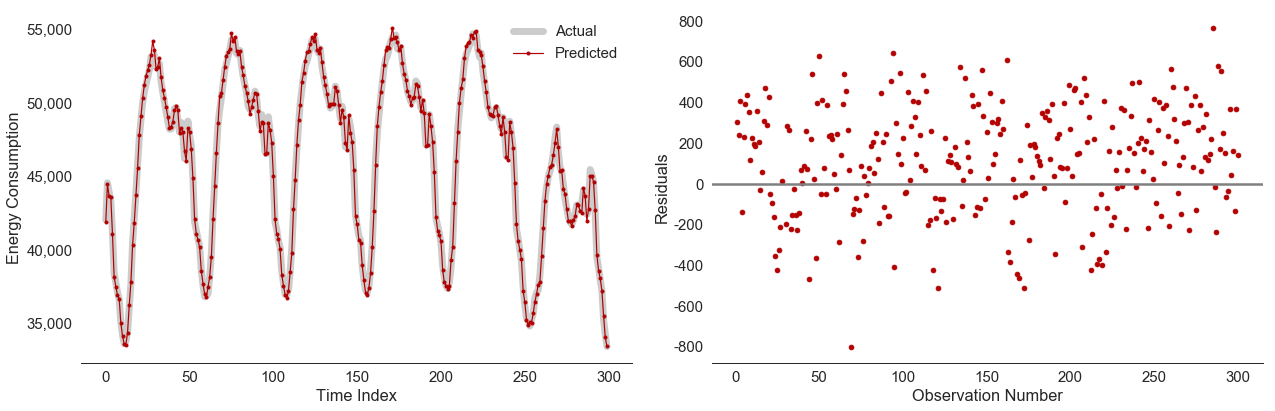

In [25]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.7)  

plt.figure(figsize=(18,6))

ax=plt.subplot(1,2,1)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.plot(testY1[:300], linewidth=7, color='#cccccc', label = "Actual")
plt.plot(testPredict1[:300], linewidth=1.2, color='#b30000', marker='o', markersize=3,
         label = "Predicted")

plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.xlabel('Time Index')
plt.ylabel('Energy Consumption')
plt.tight_layout()
plt.legend(loc='upper left')
plt.legend(frameon=False)

ax=plt.subplot(1,2,2)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
a1=testY1[:300]
b1=testPredict1[:300]
res=(a1-b1)
res+=150
res=res[(res<850) & (res>-850)]

x=np.linspace(1,300, num=300)
plt.scatter(x,res, color='#b30000')
l = plt.axhline(y=0, color='#808080', linewidth=2.5)
plt.ylabel('Residuals')
plt.xlabel('Observation Number');
sns.despine(left=True)
plt.tight_layout()
plt.savefig('Fig15.png', bbox_inches='tight', dpi=300)

In [47]:
testY2=testY.transpose()
print(testY2.shape)
testPredict2=testPredict
print(testPredict2.shape)

(40944, 1)
(40944, 1)


In [48]:
print(testY2[1])
print(testPredict[1])

[44566.99974582]
[44474.29]


In [49]:
from sklearn.metrics import mean_absolute_error
(mean_absolute_error(testY1.iloc[1], testPredict1.iloc[1])/testY1.iloc[1])*100

0   0.21
Name: 1, dtype: float64

In [50]:
ls=[]
for i in range(len(testY1[:500])):
    a=((abs(testY2[i]-testPredict2[i])/testY2[i]))*100
    #print(type(a))
    ls.append(a)

In [51]:
a=str(round(ls[10].item(),ndigits=2))+str('%')
b=str(round(ls[100].item(),ndigits=2))+str('%')
c=str(round(ls[200].item(),ndigits=2))+str('%')
d=str(round(ls[300].item(),ndigits=2))+str('%')
e=str(round(ls[400].item(),ndigits=2))+str('%')
f=str(round(ls[499].item(),ndigits=2))+str('%')

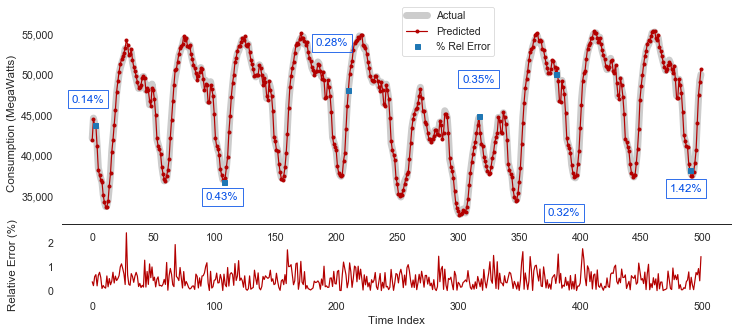

In [69]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
plt.figure(figsize=(12,5))
ax1=plt.subplot2grid((8,1),(0,0), rowspan=6, colspan=1)
ax2=plt.subplot2grid((8,1),(6,0), rowspan=2, colspan=1, sharex=None)


markers_on = [2, 108, 210, 317,380,490]

ax1.plot(testY1[:500], linewidth=7, color='#cccccc', label = "Actual") 
ax1.plot(testPredict1[:500], linewidth=1.2, color='#b30000', marker='o', markersize=3, 
         label = "Predicted")
ax1.plot(testPredict1[:500], linewidth=0, color='#1f77b4', marker='s', markersize=5,
         markevery=markers_on, label='% Rel Error')


plt.box(on=False)
ax1.annotate(a, xy=(10, 47500), horizontalalignment='right', verticalalignment='top',color='#004de6',
            bbox=dict(facecolor='none', edgecolor='#004de6'))
ax1.annotate(b, xy=(120, 35500), horizontalalignment='right', verticalalignment='top',color='#004de6',
            bbox=dict(facecolor='none', edgecolor='#004de6'))
ax1.annotate(c, xy=(210, 54500), horizontalalignment='right', verticalalignment='top',color='#004de6',
            bbox=dict(facecolor='none', edgecolor='#004de6'))
ax1.annotate(d, xy=(330, 50000), horizontalalignment='right', verticalalignment='top',color='#004de6',
            bbox=dict(facecolor='none', edgecolor='#004de6'))
ax1.annotate(e, xy=(400, 33500), horizontalalignment='right', verticalalignment='top',color='#004de6',
            bbox=dict(facecolor='none', edgecolor='#004de6'))
ax1.annotate(f, xy=(500, 36500), horizontalalignment='right', verticalalignment='top',color='#004de6',
            bbox=dict(facecolor='none', edgecolor='#004de6'))
#ax1.set_xaxis_off()
#ax1.axes.get_xaxis().set_visible(False)
ax1.set_ylabel('Consumption (MegaWatts)')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.xaxis.set_ticks(np.arange(0, 501, 50))

ax1.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 1.1))
#ax1.legend(frameon=False)

ax2.plot(ls,color='#b30000')

#ax2.set_xlabel('Observation Number')
plt.xlabel('Time Index')
ax2.set_ylabel('Relative Error (%)  ',labelpad=30)
sns.despine(top=True, left=True, bottom=False)
plt.tight_layout()
plt.savefig('Fig16.1.png', bbox_inches='tight', dpi=300)

In [ ]:
    df.MAE_ExtraTrees.plot(color='#ff8080',linewidth=2, marker='s',markersize=6)
    df.MAE_LSTM.plot(color='#cc0000',linewidth=2, marker='o',markersize=6)
    df.RMSE_ExtraTrees.plot(color='#80b3ff',linewidth=2, marker='s',markersize=6)
    df.RMSE_LSTM.plot(color='#0047b3',linewidth=2, marker='o',markersize=6)

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.5)  
plt.figure(figsize=(16,5))

with pd.plot_params.use('x_compat', True):
    plt.plot(testY[:720], color='#000000', linewidth=3.7, label = "Test Data")
    plt.plot(testPredict[:720],color='#80aaff', linewidth=1, marker='o',markersize=5, label = "Test Predict")
    plt.tick_params(left=False, labelleft=True) #remove ticks
    

plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.xlabel('Time Index')
plt.ylabel('Energy Consumption')
plt.legend(loc='upper right');
plt.show()
plt.savefig('Fig8.png', dpi=500)

## TIMESERIESSPLIT

In [ ]:
dataset.shape

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=10)
plt.figure(1)

index = 1
for train_index, test_index in splits.split(dataset):
	train = dataset[train_index]
	test = dataset[test_index]
	#print('Observations: %d' % (len(train) + len(test)))
	#print('Training Observations: %d' % (len(train)))
	#print('Testing Observations: %d' % (len(test)))
	plt.figure(figsize=(14,6))  
	sns.set_style('white')
	sns.set_context("paper", font_scale=1.5)  
    
    
	plt.subplot(910 + index)
	plt.plot(train)
	plt.plot([None for i in train] + [x for x in test])
	index += 1
	plt.xlabel('')
	plt.tick_params(left=False, labelleft=True) #remove ticks
	plt.box(False)
plt.show();

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  

In [ ]:
from pandas import Series
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

X = dataset
splits = TimeSeriesSplit(n_splits=10)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	#pyplot.subplot(910 + index)
	#pyplot.plot(train)
	#pyplot.plot([None for i in train] + [x for x in test])
	index += 1
#pyplot.show()

In [ ]:
dataset1=dataset[:157819]

In [ ]:
dataset.shape

In [ ]:
# split into train and test sets
train_size = int(len(dataset1) * 0.83)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


from keras.callbacks import EarlyStopping
import time


# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(trainX, trainY, epochs=180, shuffle=True,batch_size=125, validation_data=(testX, testY), 
                callbacks=[EarlyStopping(monitor='val_loss', patience=30)], verbose=1)

end = time.time()
# Training Phase
model.summary()

print ("Model took %0.2f seconds to train"%(end - start))

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

print('Mean Absolute Error Train:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Mean Squared Error Train:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(trainY[0], trainPredict[:,0]))


print('Mean Absolute Error Test:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))


In [ ]:
res={'Folds':[1,2,3,4,5],
    'MAE_LSTM':[327,321,272,232,235],
    'RMSE_LSTM':[446,423,388,316,317],
    'MAE_ExtraTrees':[414,372,358,301,275],
    'RMSE_ExtraTrees':[617,582,526,441,403]}

In [ ]:
type(res)

In [ ]:
df = pd.DataFrame.from_dict(res)
df

In [ ]:
df=df.set_index('Folds')

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  


with pd.plot_params.use('x_compat', True):
    df.MAE_ExtraTrees.plot(color='#ff8080',linewidth=2, marker='s',markersize=6)
    df.MAE_LSTM.plot(color='#cc0000',linewidth=2, marker='o',markersize=6)
    df.RMSE_ExtraTrees.plot(color='#80b3ff',linewidth=2, marker='s',markersize=6)
    df.RMSE_LSTM.plot(color='#0047b3',linewidth=2, marker='o',markersize=6)

#df.plot(x='Folds',linewidth=2, marker='o',markersize=5)
#plt.xticks(np.arange(min(df.Folds), max(df.Folds)+1, 1.0))
plt.xticks([0, 1, 2, 3, 4], ['1 (17%)', '2 (33%)', '3 (50%)','4 (67%)','5 (83%)'])
#plt.tick_params(left=True, labelleft=True) #remove ticks
plt.box(False)
#plt.margins(0.2)
plt.xlabel('No of Folds / Training Set Size',labelpad=15)
plt.ylabel('MAE / RMSE')
plt.legend(loc='upper right');
plt.tight_layout()
plt.savefig('Fig9.png', dpi=300)

In [ ]:
plt.figure()


with pd.plot_params.use('x_compat', True):
    df.MAE_ExtraTrees.plot(color='r')
    df.MAE_LSTM.plot(color='g')
    df.RMSE_ExtraTrees.plot(color='b')

### Horizon Validation

In [ ]:
bp=pd.read_excel('BOX.xlsx')
bp.head(2)

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
a=plt.figure(figsize=(8,5))
sns.boxplot( x='Model', y='CV (RMSE)',data=bp, hue='Set', color='#ff1a1a');
sns.despine(left=True);
plt.tight_layout() 

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
#plt.savefig('Fig2.png', dpi=300)